In [1]:
import matplotlib
import seaborn as sns
import quandl
import numpy as np
import scipy as sp
import pandas as pd
from pandas.tools.plotting import autocorrelation_plot
import sklearn.metrics
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [2]:
apple=quandl.get("WIKI/AAPL")
apple.tail()


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-14,180.32,180.52,177.8100,178.44,29075469.0,0.0,1.0,180.32,180.52,177.8100,178.44,29075469.0
2018-03-15,178.50,180.24,178.0701,178.65,22584565.0,0.0,1.0,178.50,180.24,178.0701,178.65,22584565.0
2018-03-16,178.65,179.12,177.6200,178.02,36836456.0,0.0,1.0,178.65,179.12,177.6200,178.02,36836456.0
2018-03-19,177.32,177.47,173.6600,175.30,32804695.0,0.0,1.0,177.32,177.47,173.6600,175.30,32804695.0
2018-03-20,175.24,176.80,174.9400,175.24,19314039.0,0.0,1.0,175.24,176.80,174.9400,175.24,19314039.0


In [3]:
apple.shape

(9395, 12)

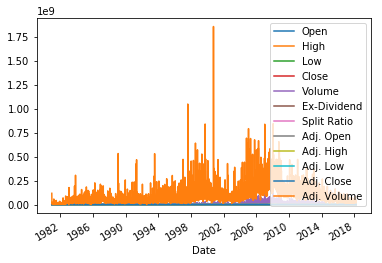

In [4]:
apple.plot()

In [5]:
apple.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [6]:
col=['Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']
apple.drop(col,inplace=True,axis=1,errors='ignore')
apple.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0


In [7]:
ap=apple.tail(400)
ap.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-08-15,108.14,109.54,108.08,109.48,25868209.0
2016-08-16,109.63,110.23,109.21,109.38,33794448.0
2016-08-17,109.10,109.37,108.34,109.22,25355976.0
2016-08-18,109.23,109.60,109.02,109.08,21984703.0
2016-08-19,108.77,109.69,108.36,109.36,25368072.0


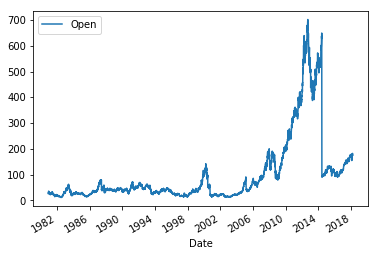

In [8]:
stp= apple[['Open']].copy()
stp.plot()

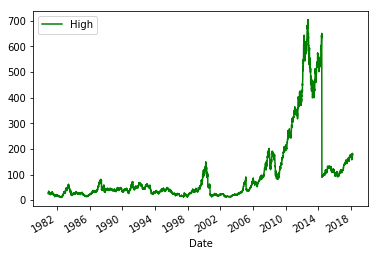

In [9]:
maxp= apple[['High']].copy()
maxp.plot(color="g")

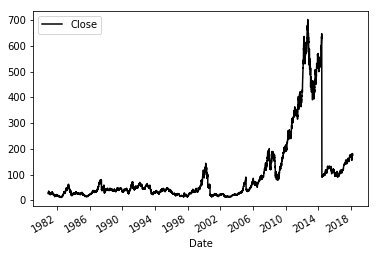

In [10]:
ltp= apple[['Close']].copy()
ltp.plot(color="black")

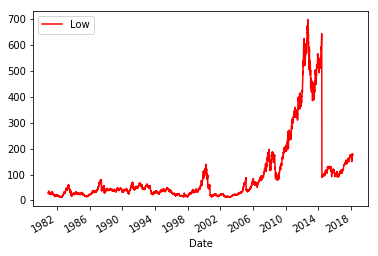

In [11]:
minp= apple[['Low']].copy()
minp.plot(color="r")

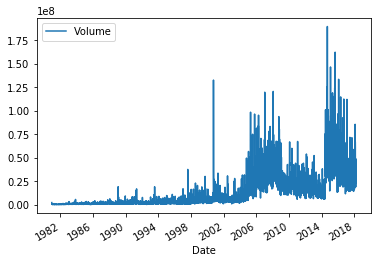

In [12]:
volp= apple[['Volume']].copy()
volp.plot()

In [13]:
apple.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,9395.0,1.011963e+02,1.351957e+02,11.12,27.0,43.75,110.00,7.024100e+02
High,9395.0,1.024293e+02,1.363205e+02,11.12,27.5,44.50,111.57,7.050700e+02
Low,9395.0,9.986020e+01,1.338560e+02,11.00,26.5,43.00,108.64,6.995700e+02
Close,9395.0,1.011583e+02,1.351142e+02,11.00,27.0,43.81,109.99,7.021000e+02
Volume,9395.0,1.197157e+07,1.661630e+07,4471.00,1231900.0,3771000.00,17977000.00,1.895606e+08


In [14]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    
    rolmean = pd.rolling_mean(timeseries, window=365)
    rolstd = pd.rolling_std(timeseries, window=365)

    
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

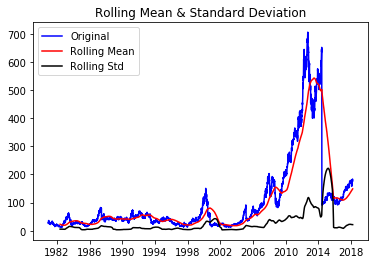

Results of Dickey-Fuller Test:
Test Statistic                   -2.116752
p-value                           0.237832
#Lags Used                       31.000000
Number of Observations Used    9363.000000
Critical Value (1%)              -3.431049
Critical Value (5%)              -2.861849
Critical Value (10%)             -2.566934
dtype: float64


In [15]:
test_stationarity(apple['High'])

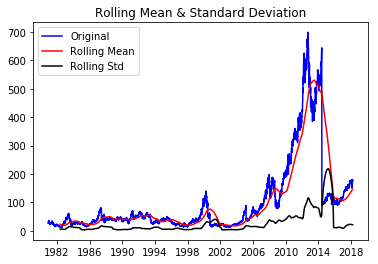

Results of Dickey-Fuller Test:
Test Statistic                   -2.115275
p-value                           0.238417
#Lags Used                       31.000000
Number of Observations Used    9363.000000
Critical Value (1%)              -3.431049
Critical Value (5%)              -2.861849
Critical Value (10%)             -2.566934
dtype: float64


In [16]:
test_stationarity(apple['Low'])

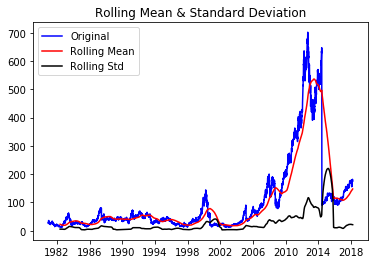

Results of Dickey-Fuller Test:
Test Statistic                   -2.148092
p-value                           0.225621
#Lags Used                       32.000000
Number of Observations Used    9362.000000
Critical Value (1%)              -3.431049
Critical Value (5%)              -2.861849
Critical Value (10%)             -2.566934
dtype: float64


In [17]:
test_stationarity(apple['Close'])

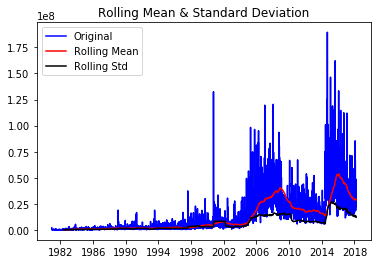

Results of Dickey-Fuller Test:
Test Statistic                   -3.289975
p-value                           0.015333
#Lags Used                       32.000000
Number of Observations Used    9362.000000
Critical Value (1%)              -3.431049
Critical Value (5%)              -2.861849
Critical Value (10%)             -2.566934
dtype: float64


In [18]:
test_stationarity(apple['Volume'])

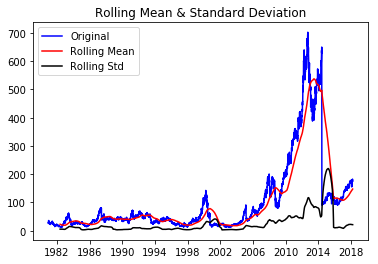

Results of Dickey-Fuller Test:
Test Statistic                   -2.122652
p-value                           0.235504
#Lags Used                       31.000000
Number of Observations Used    9363.000000
Critical Value (1%)              -3.431049
Critical Value (5%)              -2.861849
Critical Value (10%)             -2.566934
dtype: float64


In [19]:
test_stationarity(apple['Open'])

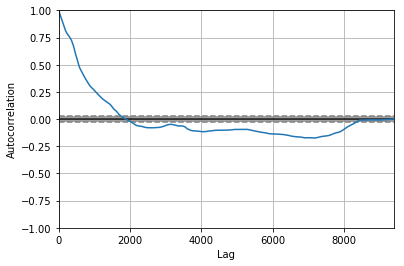

In [20]:
autocorrelation_plot(minp)

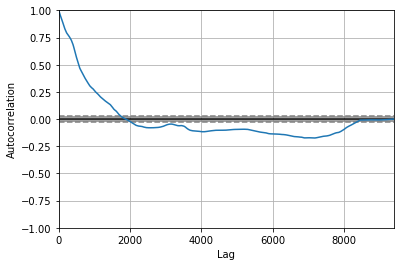

In [21]:
autocorrelation_plot(maxp)

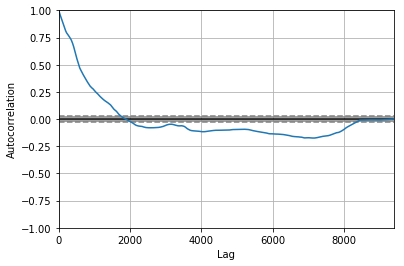

In [22]:
autocorrelation_plot(ltp)

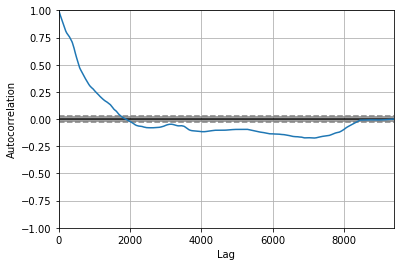

In [23]:
autocorrelation_plot(stp)

In [24]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(apple.Low,order=(10,2,2))
model_fit = model.fit(disp=0)


In [45]:
arima_pred = model_fit.predict(apple['Low'].index[8500], apple['Low'].index[-1], typ="levels")

0.3004765630002879


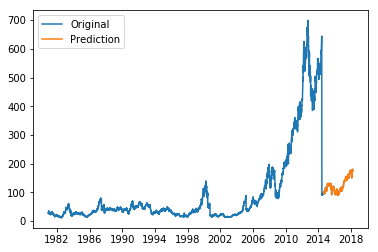

In [70]:
plt.plot(apple.Low, label='Original')
plt.plot(arima_pred, label='Prediction')
plt.legend(loc=2)
x=apple.Low[8500]-arima_pred[0]
print(x)

1.2449557387964991


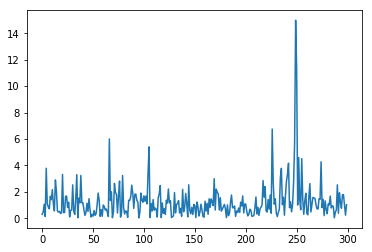

In [87]:
r=8500
i=0
f=list()
for r in range(8500,8800):
    z=apple.Low[r]-arima_pred[i]
    z=(z/apple.Low[r])*100
    if z<0:
        z=-z
    f.append(z)
    r=r+1
    i=i+1
#print(f)
plt.plot(f)
average=sum(f)/len(f)
print(average)

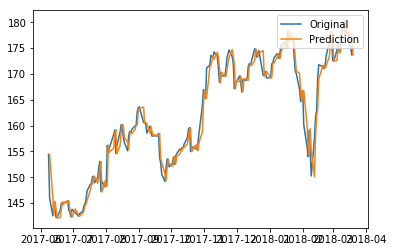

In [82]:
arima_pred_recent = model_fit.predict(apple['Low'].index[9200], apple['Low'].index[-1], typ="levels")
plt.plot(apple.Low[9200:], label='Original')
plt.plot(arima_pred_recent, label='Prediction')
plt.legend(loc=1)